0부터 9까지 숫자를 예측하는 다중 분류 문제

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
# 애초에 분리돼서 받아진다.

11493376/11490434 [==============================] - 0s 0us/step


데이터 형태 확인하기

In [4]:
# 훈련 데이터
print(x_train.shape, y_train.shape)

print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)

print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


In [20]:
print(x_train[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

데이터 그려보기

Text(0.5, 1.0, '2-th data, label is 4')

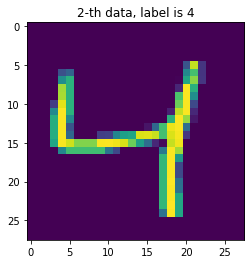

In [8]:
import matplotlib.pyplot as plt
import numpy as np

idx = 2
img = x_train[idx, :]
label = y_train[idx]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' % (idx,label))


검증 데이터 만들기

In [9]:
from sklearn.model_selection import train_test_split

#검증 데이터 = 쪽지시험

# 훈련 검증 데이터를 7:3 비율로 분리하기
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.3,
                                                  random_state =777)

In [10]:
print(f'훈련 데이터 : {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 : {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 : (42000, 28, 28) 레이블 (42000,)
검증 데이터 : (18000, 28, 28) 레이블 (18000,)


모델 입력을 위한 훈련 데이터(손글씨 이미지) 전처리

1) 2차원 배열을 1차원 배열로 바꿔줘야 한다.(28 * 28 = 784)

In [14]:
# 모델의 입력으로 사용하기 위한 전처리 과정을 진행하기

num_x_train = x_train.shape[0] # 42000
num_x_train

num_x_val = x_val.shape[0] # 18000
num_x_val

num_x_test = x_test.shape[0] # 10000
num_x_test

10000

In [17]:
# 2차원 배열을 1차원 배열로 변경하기(28 * 28 = 784)

x_train = (x_train.reshape((num_x_train, 28 * 28)))
x_val = (x_val.reshape((num_x_val, 28 * 28)))
x_test = (x_test.reshape((num_x_test, 28 * 28)))

print(x_train.shape) # 모델 입력을 위해 데이터를 784의 1차원으로 변경함
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [18]:
# 신경망은 스케일에 매우 민감함!

# Nomalization(minmax) 모든 컬럼들의 구간이 모두 동일할 때 사용한다.이미지나 픽셀에서 사용
# Standardization: feature들의 값이 들쑥날쑥할 때 사용함 
# Robury Nomalization

In [19]:
# 데이터 스케일링 0 ~ 255를 0 ~ 1사이의 값으로 바꿔주는 작업을 한다. MinMax 알고리즘을 사용한다.

x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

print(x_train[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.09803922 0.49411765 0.81568627 0.99607843 

모델 입력을 위한 레이블(정잡) 전처리

In [21]:
# 비교
y_train

array([2, 7, 6, ..., 3, 4, 5], dtype=uint8)

In [23]:
from tensorflow.keras.utils import to_categorical
# 알아서 범주형으로 만들어줌
# 각 데이터의 레이블 0 ~ 9 숫자 값을 범주형 형태로 변경해준다.

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [24]:
y_train
# 다중분류 비교할 때 꼭 이렇게 사용한다. / 위치정보가 숫자값이 된다. 

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

모델 구성하기

In [27]:
# 다중분류에서는 softmax를 사용한다.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

# softmax 는 도합이 1이되게 만든다. 다중분류에서는 softmax를 쓰게 되어 있다.


모델 설정하기

In [28]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

모델 학습시키기

In [30]:
history = model.fit(x_train, y_train, 
                    epochs=30,
                    batch_size=128,
                    validation_data = (x_val, y_val))


Epoch 1/30
329/329 [==============================] - 16s 6ms/step - loss: 0.8851 - accuracy: 0.7422 - val_loss: 0.2383 - val_accuracy: 0.9329
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2140 - accuracy: 0.9392 - val_loss: 0.1805 - val_accuracy: 0.9476
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1534 - accuracy: 0.9547 - val_loss: 0.1531 - val_accuracy: 0.9562
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1233 - accuracy: 0.9642 - val_loss: 0.1391 - val_accuracy: 0.9605
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1031 - accuracy: 0.9693 - val_loss: 0.1345 - val_accuracy: 0.9607
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0861 - accuracy: 0.9747 - val_loss: 0.1336 - val_accuracy: 0.9594
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0809 - accuracy: 0.9759 - val_loss: 0.1197 - val_accuracy: 0.9657
Epoch

학습결과 그리기

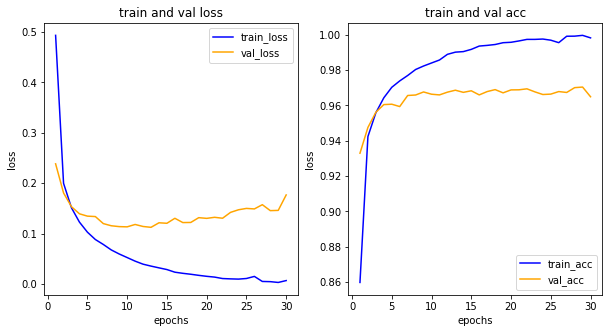

In [31]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

# train 정확도와 val 정확도가 만나는 시점이 가장 좋은 spot이다.
# 만약 이 격차가 벌어진다면 overfitting 된다고 볼 수 있다.

모델 평가하기

In [34]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.1585 - accuracy: 0.9678
accuracy: 96.78%


예측값 그려서 확인해보기

In [35]:
import numpy as np
np.set_printoptions(suppress=True)

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7) # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results[0]}')


(10000, 10)
각 클래스에 속할 확률 : 
[0.        0.        0.        0.0000052 0.        0.        0.
 0.9999946 0.        0.0000002]


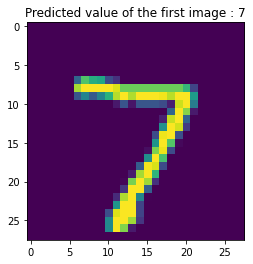

In [36]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.(0.9999946)
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()


모델 평가 방법 1 - 혼동 행렬

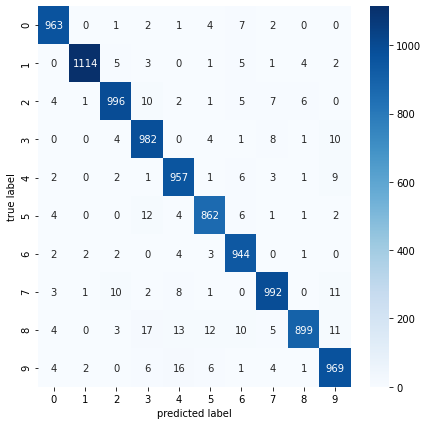

In [37]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# 색이 진할수록 정확도가 높아진다.
# 예측에 많이 틀리는 것을 찾을 수 있다.


모델 평가 방법 2 - 분류 보고서

In [38]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

# recall 값이 가장 떨어지는 8값의 글씨를 보완해서 학습을 시키자



               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.95      0.97      0.96       982
           5       0.96      0.97      0.96       892
           6       0.96      0.99      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.98      0.92      0.95       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

